# Proyek Analisis Data: [Bike Sharing Data]
- **Nama:** [Naufal Farros S Dharojat]
- **Email:** [ofa252116@gmail.com]
- **ID Dicoding:** [Naufal Farros S Dharojat]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pola penyewaan sepeda per jam dalam sehari? (Menggunakan dataset Hour)
- Pertanyaan 2: Apa pengaruh suhu terhadap jumlah penyewaan sepeda? (Menggunakan dataset Day)
- Pertanyaan 3: Bagaimana tren penyewaan sepeda saat dikombinasikan antara data hour dan day?
- Pertanyaan 4: Bagaimana perbandingan pola penyewaan sepeda pada akhir pekan vs. hari kerja?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [3]:
print("\nMemuat dataset...")
df_hour = pd.read_csv('/content/drive/MyDrive/Dicoding/bike-sharing-data/hour.csv')
df_day = pd.read_csv('/content/drive/MyDrive/Dicoding/bike-sharing-data/day.csv')


Memuat dataset...


### Assessing Data

In [6]:
print("\nTinjauan Dataset Hour:")
df_hour.head()


Tinjauan Dataset Hour:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
print("\nTinjauan Dataset Day:")
df_day.head()


Tinjauan Dataset Day:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
print("\nInformasi Dasar Dataset Hour:")
print(df_hour.info())
print("\nMemeriksa nilai yang hilang pada Dataset Hour:")
print(df_hour.isnull().sum())


Informasi Dasar Dataset Hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Memeriksa ni

In [8]:
print("\nInformasi Dasar Dataset Day:")
print(df_day.info())
print("\nMemeriksa nilai yang hilang pada Dataset Day:")
print(df_day.isnull().sum())


Informasi Dasar Dataset Day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Memeriksa nilai yang hilang pada Dataset Day:
instant    

**Insight:**
- Berdasarkan Assessing Data diatas, hal yang perlu dilakukan selanjutnya adalah mengubah tipe data kolom **dteday** dari *object* ke *datetime*.

### Cleaning Data

In [9]:
print("\nMemeriksa duplikasi pada Dataset Hour:")
print(f"Jumlah duplikasi: {df_hour.duplicated().sum()}")
df_hour.drop_duplicates(inplace=True)
print("\nDuplikasi pada Dataset Hour dihapus.")


Memeriksa duplikasi pada Dataset Hour:
Jumlah duplikasi: 0

Duplikasi pada Dataset Hour dihapus.


In [10]:
print("\nMemeriksa duplikasi pada Dataset Day:")
print(f"Jumlah duplikasi: {df_day.duplicated().sum()}")
df_day.drop_duplicates(inplace=True)
print("\nDuplikasi pada Dataset Day dihapus.")


Memeriksa duplikasi pada Dataset Day:
Jumlah duplikasi: 0

Duplikasi pada Dataset Day dihapus.


In [11]:
# Mengonversi kolom 'dteday' ke format datetime
print("\nMengonversi kolom 'dteday' ke datetime...")
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
print("\nKolom 'dteday' berhasil dikonversi.")


Mengonversi kolom 'dteday' ke datetime...

Kolom 'dteday' berhasil dikonversi.


In [12]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Berdasarkan Cleaning Data diatas, kita mengecek apakah terdapat data dupilkasi atau tidak dan hasilnya **tidak ada**
- Setelah itu kita melakukan perubahan tipe data untuk kolom **dteday** dari *object* ke *datetime*

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
print("\nStatistik Deskriptif Dataset Hour:")
df_hour.describe()


Statistik Deskriptif Dataset Hour:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Statistik deskriptif memberikan gambaran tentang distribusi data dan outlier potensial.

In [15]:
print("\nStatistik Deskriptif Dataset Day:")
df_day.describe()


Statistik Deskriptif Dataset Day:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Distribusi data di dataset Day diperiksa untuk memahami variabilitas data.

In [17]:
# Rata-rata penyewaan sepeda per jam
grouped_hour = df_hour.groupby('hr')['cnt'].mean().reset_index()
print("\nRata-rata penyewaan sepeda per jam:")
grouped_hour


Rata-rata penyewaan sepeda per jam:


,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


Menemukan jam dengan rata-rata penyewaan tertinggi membantu menentukan waktu sibuk.

In [18]:
# Rata-rata penyewaan sepeda per hari dalam seminggu
df_day['weekday'] = df_day['dteday'].dt.day_name()
grouped_day = df_day.groupby('weekday')['cnt'].mean().sort_values(ascending=False).reset_index()
print("\nRata-rata penyewaan sepeda per hari dalam seminggu:")
grouped_day


Rata-rata penyewaan sepeda per hari dalam seminggu:


,weekday,cnt
0,Friday,4690.288462
1,Thursday,4667.259615
2,Saturday,4550.542857
3,Wednesday,4548.538462
4,Tuesday,4510.663462
5,Monday,4338.123810
6,Sunday,4228.828571


Memahami pola penyewaan mingguan untuk melihat apakah akhir pekan atau hari kerja lebih sibuk.

In [19]:
# Rata-rata penyewaan sepeda berdasarkan musim
grouped_season = df_day.groupby('season')['cnt'].mean().reset_index()
print("\nRata-rata penyewaan sepeda berdasarkan musim:")
grouped_season


Rata-rata penyewaan sepeda berdasarkan musim:


,season,cnt
0,1,2604.132597
1,2,4992.331522
2,3,5644.303191
3,4,4728.162921


Memahami bagaimana rata-rata jumlah penyewaan sepeda berubah sepanjang musim (misalnya, musim panas, musim dingin, musim gugur, dan musim semi).

In [25]:
# Menandai akhir pekan dan hari kerja
df_day['is_weekend'] = df_day['weekday'].isin(['Saturday', 'Sunday'])
grouped_weekend = df_day.groupby('is_weekend')['cnt'].mean().reset_index()
grouped_weekend['type'] = grouped_weekend['is_weekend'].map({True: 'Akhir Pekan', False: 'Hari Kerja'})
print("\nRata-rata penyewaan sepeda berdasarkan akhir pekan vs hari kerja:")
grouped_weekend


Rata-rata penyewaan sepeda berdasarkan akhir pekan vs hari kerja:


,is_weekend,cnt,type
0,False,4550.566219,Hari Kerja
1,True,4389.685714,Akhir Pekan


Perbandingan ini berguna untuk melihat perbedaan tren penyewaan antara akhir pekan dan hari kerja.


In [23]:
print("\nMenggabungkan dataset Hour dan Day berdasarkan kolom 'dteday'...")
merged_df = pd.merge(df_hour, df_day[['dteday', 'season']], on='dteday', how='left')
print("\nPenggabungan dataset selesai.")
merged_df.head()


Menggabungkan dataset Hour dan Day berdasarkan kolom 'dteday'...

Penggabungan dataset selesai.


,instant,dteday,season_x,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


In [24]:
print("\nData untuk visualisasi tren penyewaan sepeda berdasarkan musim:")
merged_df[['season_x', 'cnt']].head()


Data untuk visualisasi tren penyewaan sepeda berdasarkan musim:


,season_x,cnt
0,1,16
1,1,40
2,1,32
3,1,13
4,1,1


Hasil dari penggabungan ini dapat digunakan untuk visualisasi lanjutan, seperti boxplot yang menunjukkan distribusi penyewaan berdasarkan musim.

**Insight:**
- Berdasarkan data data diatas, kita bisa menemukan jam dengan rata-rata penyewaan tertinggi membantu menentukan waktu sibuk.
- Selain itu memahami pola penyewaan mingguan untuk melihat apakah akhir pekan atau hari kerja lebih sibuk.
- Kita juga dapat memahami bagaimana rata-rata jumlah penyewaan sepeda berubah sepanjang musim (misalnya, musim panas, musim dingin, musim gugur, dan musim semi).
- Perbadiningan diatas berguna untuk melihat perbedaan tren penyewaan antara akhir pekan dan hari kerja.
- Dari data **marge_df** kita bisa melihat distribusi penyewaan berdasarkan musim.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penyewaan sepeda per jam dalam sehari? (Menggunakan dataset Hour)


Data untuk visualisasi penyewaan sepeda per jam:
   hr        cnt
0   0  53.898072
1   1  33.375691
2   2  22.869930
3   3  11.727403
4   4   6.352941


<ipython-input-26-65aa8ba986ea>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_hour, x='hr', y='cnt', palette=colors)


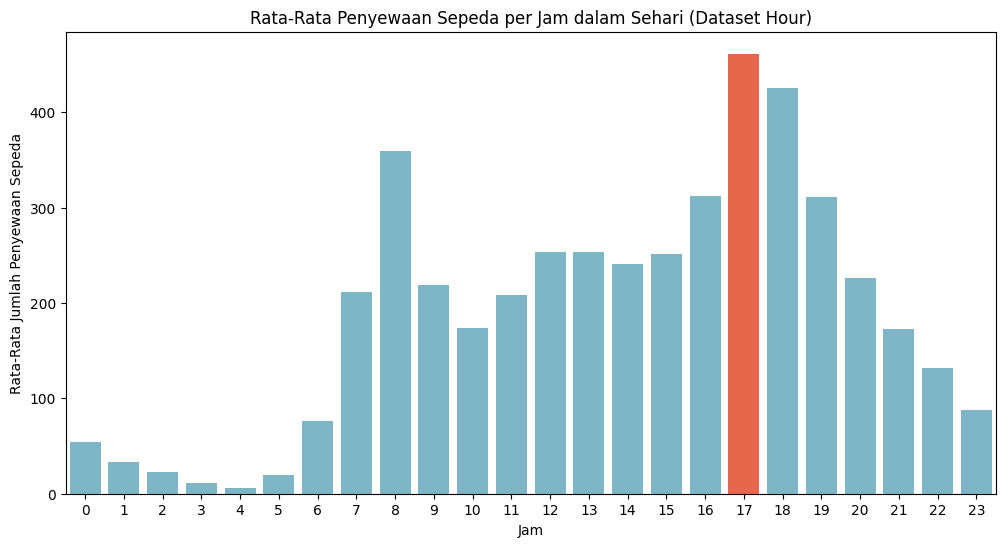

In [26]:
# Menampilkan proses data untuk visualisasi
print("\nData untuk visualisasi penyewaan sepeda per jam:")
print(grouped_hour.head())

plt.figure(figsize=(12, 6))
colors = ['#72BCD4' if cnt != grouped_hour['cnt'].max() else '#FF5733' for cnt in grouped_hour['cnt']]
sns.barplot(data=grouped_hour, x='hr', y='cnt', palette=colors)
plt.title('Rata-Rata Penyewaan Sepeda per Jam dalam Sehari (Dataset Hour)')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Jumlah Penyewaan Sepeda')
plt.show()

Visualisasi ini menunjukkan jam-jam sibuk untuk penyewaan sepeda. Jam tersibuk untuk penyewaan sepeda adalah jam 17. sedangkan jam penyewaan yang senggang adalah jam 4

### Pertanyaan 2: Apa pengaruh suhu terhadap jumlah penyewaan sepeda? (Menggunakan dataset Day)


Data untuk visualisasi pengaruh suhu dalam Celsius terhadap penyewaan sepeda:
   temp_celsius   cnt
0     14.110847   985
1     14.902598   801
2      8.050924  1349
3      8.200000  1562
4      9.305237  1600


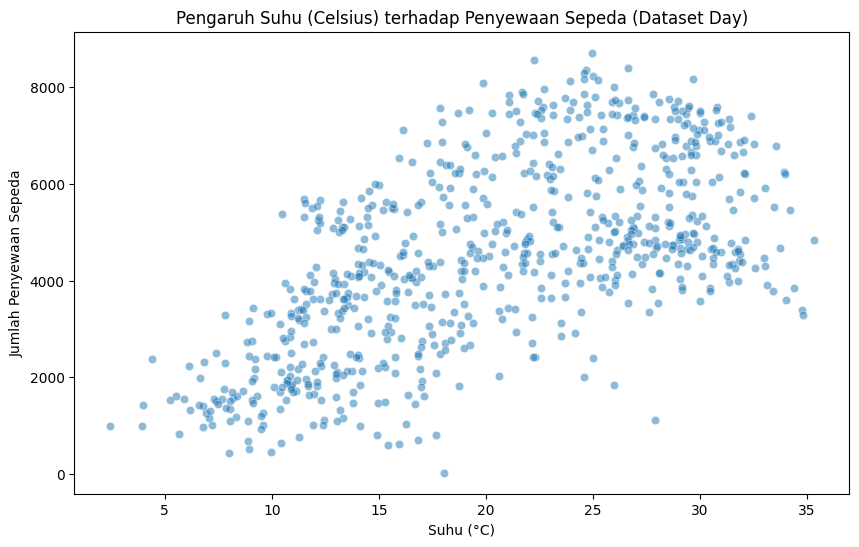

In [37]:
# Menampilkan proses data untuk visualisasi dalam Celsius
df_day['temp_celsius'] = df_day['temp'] * 41  # Mengonversi skala normalisasi ke Celsius
print("\nData untuk visualisasi pengaruh suhu dalam Celsius terhadap penyewaan sepeda:")
print(df_day[['temp_celsius', 'cnt']].head())

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_day, x='temp_celsius', y='cnt', alpha=0.5)
plt.title('Pengaruh Suhu (Celsius) terhadap Penyewaan Sepeda (Dataset Day)')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Visualisasi scatter plot ini membantu memahami hubungan antara suhu dalam Celsius dan jumlah penyewaan. Jumlah penyewaan paling sedikit 0 terjadi di suhu 18 °C. sedangkan yang paling banyak pada suhu 25 °C.

### Pertanyaan 3: Bagaimana tren penyewaan sepeda saat dikombinasikan antara data jam dan hari? (marge_df)

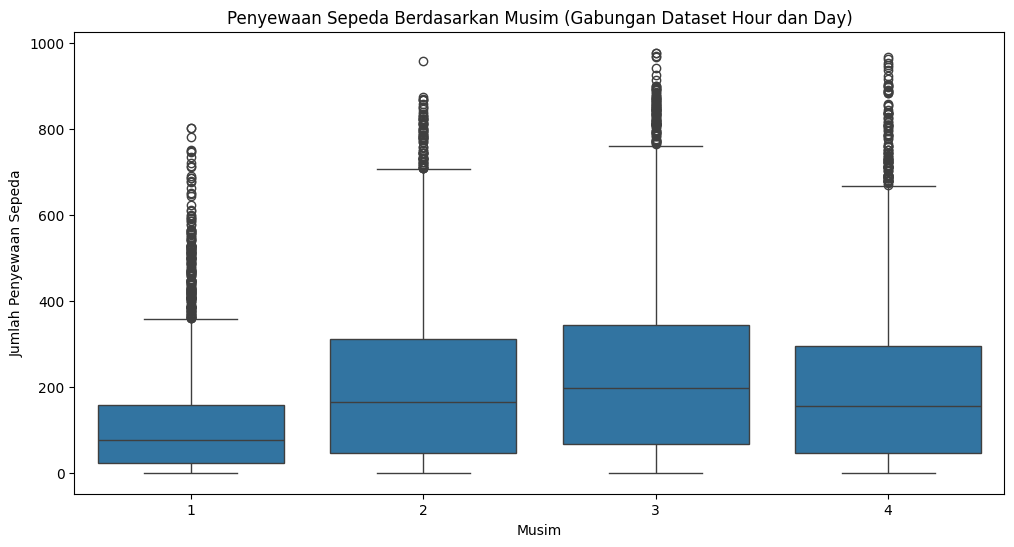

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='season_x', y='cnt')
plt.title('Penyewaan Sepeda Berdasarkan Musim (Gabungan Dataset Hour dan Day)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Boxplot ini menunjukkan bagaimana jumlah penyewaan bervariasi di setiap musim. Musim dengan jumlah penyewaan sepedanya terbanyak Musim 3. sedangkan untuk Musim dengan jumlah penyewaan sepeda yang sedikit musim 1.

### Pertanyaan 3: Bagaimana perbandingan pola penyewaan sepeda pada akhir pekan vs. hari kerja? (marge_df)

<ipython-input-31-432ae2f4555b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_weekend, x='type', y='cnt', palette=['#3498db', '#2ecc71'])


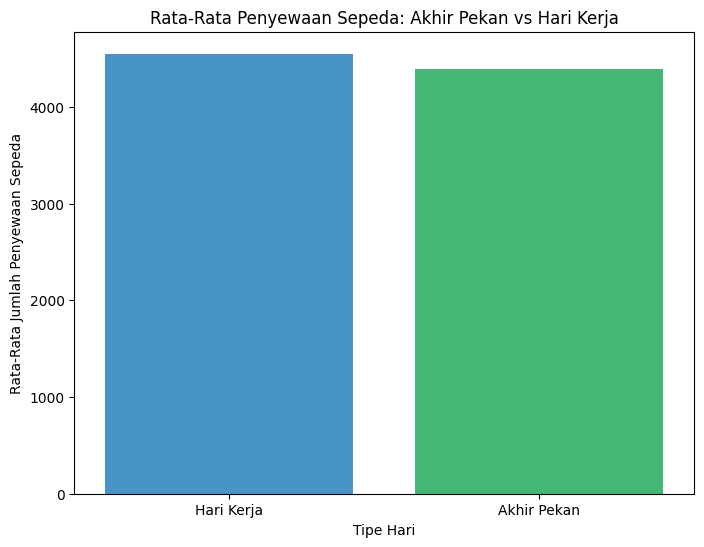

In [31]:
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_weekend, x='type', y='cnt', palette=['#3498db', '#2ecc71'])
plt.title('Rata-Rata Penyewaan Sepeda: Akhir Pekan vs Hari Kerja')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-Rata Jumlah Penyewaan Sepeda')
plt.show()

Barplot ini membantu mengidentifikasi perbedaan pola penyewaan antara hari kerja dan akhir pekan. Bisa dilihat Hari kerja relative lebih banyak dari pada akhir pekan.

**Insight:**
- Pertanyaan 1: Visualisasi ini menunjukkan jam-jam sibuk untuk penyewaan sepeda. Jam tersibuk untuk penyewaan sepeda adalah jam 17. sedangkan jam penyewaan yang senggang adalah jam 4.
- Pertanyaan 2: Visualisasi scatter plot ini membantu memahami hubungan antara suhu dalam Celsius dan jumlah penyewaan. Jumlah penyewaan paling sedikit 0 terjadi di suhu 18 °C. sedangkan yang paling banyak pada suhu 25 °C.
- Pertanyaan 3: Boxplot ini menunjukkan bagaimana jumlah penyewaan bervariasi di setiap musim. Musim dengan jumlah penyewaan sepedanya terbanyak Musim 3. sedangkan untuk Musim dengan jumlah penyewaan sepeda yang sedikit musim 1.
- Pertanyaan 4: Barplot ini membantu mengidentifikasi perbedaan pola penyewaan antara hari kerja dan akhir pekan. Bisa dilihat Hari kerja relative lebih banyak dari pada akhir pekan.

## Analisis Lanjutan (RFM Analysis)

In [35]:
rfm_table = df_day.groupby('weekday').agg(
    recency=('dteday', 'max'),
    frequency=('cnt', 'count'),
    monetary=('cnt', 'sum')
).reset_index()
print("\nRFM Analysis berdasarkan hari dalam seminggu:")
rfm_table


RFM Analysis berdasarkan hari dalam seminggu:


,weekday,recency,frequency,monetary
0,Friday,2012-12-28,104,487790
1,Monday,2012-12-31,105,455503
2,Saturday,2012-12-29,105,477807
3,Sunday,2012-12-30,105,444027
4,Thursday,2012-12-27,104,485395
5,Tuesday,2012-12-25,104,469109
6,Wednesday,2012-12-26,104,473048


<ipython-input-36-99d9aef25164>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rfm_table, x='weekday', y='monetary', palette='Blues_d')


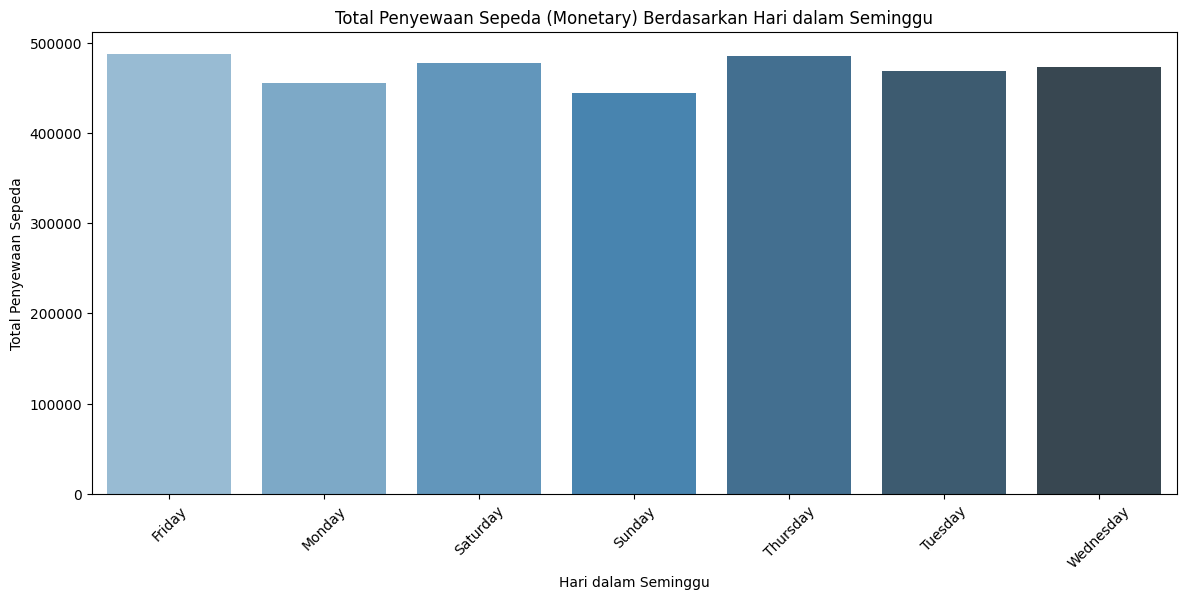

In [36]:
# Visualisasi RFM Analysis
plt.figure(figsize=(14, 6))
sns.barplot(data=rfm_table, x='weekday', y='monetary', palette='Blues_d')
plt.title('Total Penyewaan Sepeda (Monetary) Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

## Conclusion

## Pendahuluan
Notebook ini menganalisis dua dataset penyewaan sepeda: `hour.csv` dan `day.csv`, untuk menjawab pertanyaan bisnis terkait pola penggunaan sepeda di berbagai kondisi cuaca dan musim.

### Pertanyaan Bisnis yang Dibahas:
1. Bagaimana pola penyewaan sepeda per jam dalam sehari? (Dataset Hour)
2. Apa pengaruh suhu terhadap jumlah penyewaan sepeda? (Dataset Day)
3. Bagaimana tren penyewaan sepeda saat dikombinasikan antara data jam dan hari?
4. Bagaimana perbandingan pola penyewaan sepeda pada akhir pekan vs. hari kerja?

### Metodologi:
- **Pengolahan Data**: Memeriksa dan membersihkan data dari duplikasi dan nilai hilang.
- **Menggabungkan Data**: Menggabungkan dataset Hour dan Day untuk analisis gabungan.
- **Analisis Data Eksploratif (EDA)**: Statistik deskriptif dan pemahaman awal data serta analisis grup.
- **Visualisasi & Analisis Penjelasan**: Menampilkan visualisasi untuk menjawab pertanyaan bisnis.
- **Analisis Lanjutan (Opsional)**: Menjelajahi RFM analysis dan segmentasi sederhana.

## Kesimpulan
- Pola penyewaan sepeda berbeda di setiap jam dalam sehari.
- Terdapat korelasi antara suhu dan jumlah penyewaan sepeda.
- Gabungan data menunjukkan tren musiman yang dapat membantu perencanaan strategis.